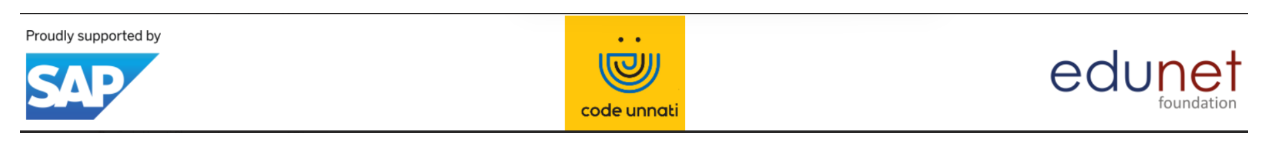

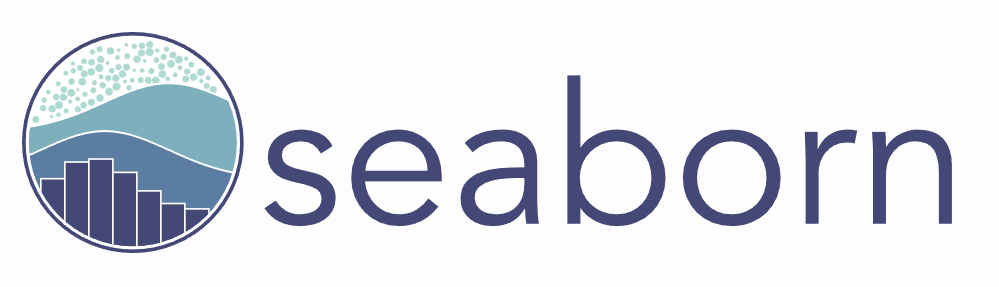

<span style="color:black;font-size: 30px; font-family: Arial; font-weight: bold;">EDUNET FOUNDATION-Classroom Exercise Notebook</span>

<span style="color:black;font-size: 30px; font-family: Arial; font-weight: bold;"> Lab 1- Data Visualization using Seaborn </span>

### Introduction to Seaborn


####  Seaborn provides a high-level interface to Matplotlib, a powerful but sometimes unwieldy Python visualization library.

#### If matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too.

Features of Seaborn :

* Using default themes that are aesthetically pleasing.
* Setting custom color palettes.
* Making attractive statistical plots.
* Easily and flexibly displaying distributions.
* Visualizing information from matrices and DataFrames.


Those last three points are why Seaborn is our tool of choice for Exploratory Analysis. It makes it very easy to “get to know” your data quickly and efficiently.

### ➡️ official documentation   :-  https://seaborn.pydata.org/

### About this Dataset

This dataset consist of data From 1985 Ward's Automotive Yearbook. Here are the sources

* Sources:

1) 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.
2) Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038
3) Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037


* Content:


This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.

The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling".

A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc…), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.

### ➡️ Import Libraries


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### ➡️ Read dataset

In this kernel, I will focus on those datasets which help to explain various features of Seaborn. So, I will read the related datasets with **pandas read_csv() function.**


In [3]:
df = pd.read_csv("/content/Automobile_data.csv")

#### ➡️ Preview the dataset

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
df.shape

(205, 26)

In [6]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

### Univariate Analysis

* Objective: To understand the distribution and key statistics of individual variables.

## | Histograms |

* Histograms are likely familiar, and a hist function already exists in matplotlib. A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

* To illustrate this, let’s remove the density curve and add a rug plot, which draws a small vertical tick at each observation. You can make the rug plot itself with the rugplot() function, but it is also available in distplot():

### ➡️ official documentation   :-  https://seaborn.pydata.org/generated/seaborn.histplot.html

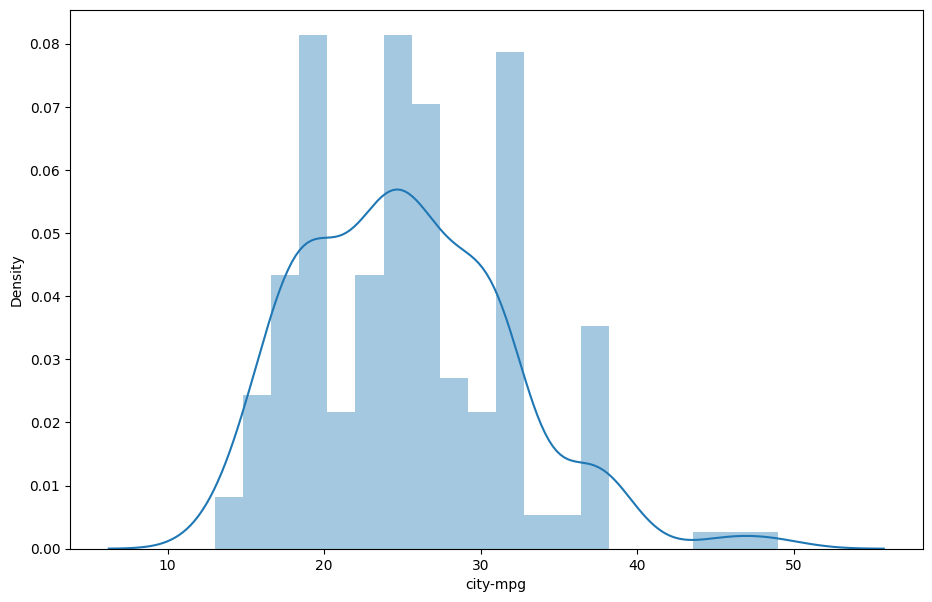

In [7]:
plt.figure(figsize=(11,7))
sns.distplot(df['city-mpg'], bins=20)
plt.show()

* Insights: The distribution of  city-mpg values, identifying the central tendency and spread.

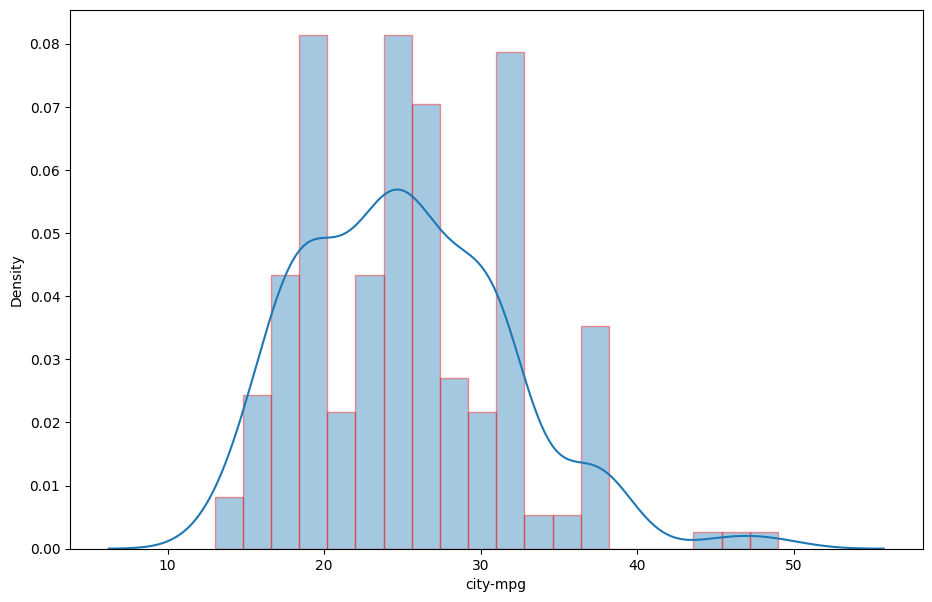

In [8]:
plt.figure(figsize=(11,7))
sns.distplot(df['city-mpg'], bins=20 ,hist_kws=dict(edgecolor = '#FF0000'))
plt.show()

## | KDE Plot |

* KDE Plot is used to estimate the **probability density function of a continuous random variable.**

* It is used for **non-parametric analysis.**

#### ➡️ official documentation   :-  https://seaborn.pydata.org/generated/seaborn.kdeplot.html

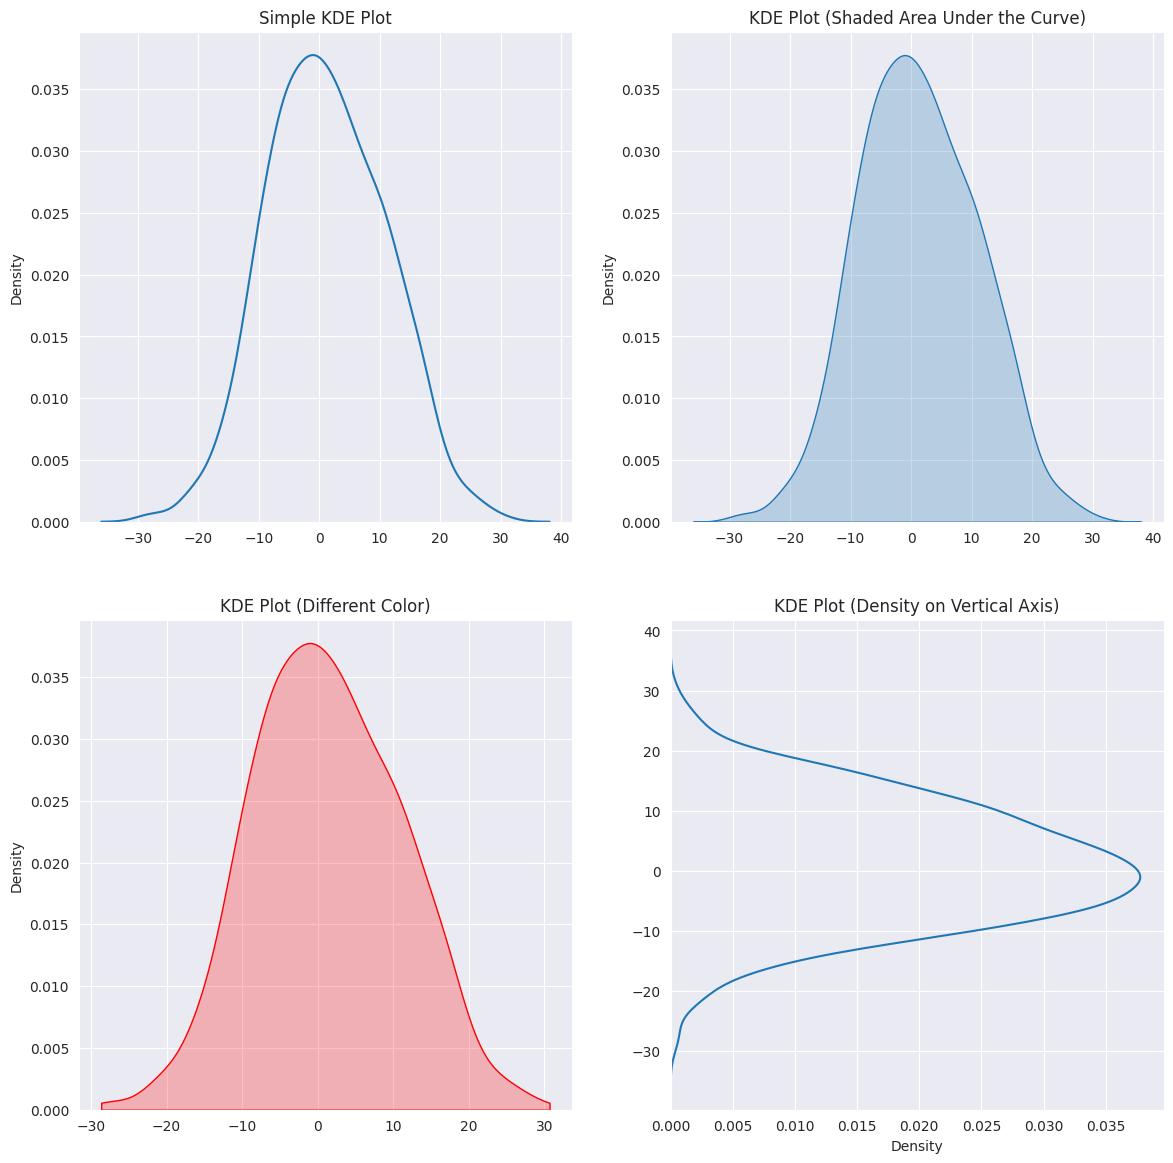

In [9]:
sns.set_style("darkgrid")
fig1 , axes = plt.subplots(nrows=2,ncols=2 , figsize = (14,14))
x = np.random.normal(1,10,1000)


#Simple KDE Plot
axes[0,0].set_title("Simple KDE Plot")
sns.kdeplot(x,ax=axes[0,0])

# Shade under the density curve using the "shade" parameter
axes[0,1].set_title("KDE Plot (Shaded Area Under the Curve)")
sns.kdeplot(x,shade=True,ax=axes[0,1])

# Shade under the density curve using the "shade" parameter and use a different color.
axes[1,0].set_title("KDE Plot (Different Color)")
sns.kdeplot(x,ax=axes[1,0],color = 'r',shade=True,cut=0)

#Plotting the density on the vertical axis
axes[1,1].set_title("KDE Plot (Density on Vertical Axis)")
sns.kdeplot(x,vertical=True)
plt.show()

##### * A distplot and kdeplot of the 'city-mpg' column can provide a comprehensive view of the fuel efficiency landscape within the dataset.

* By examining the central tendency, spread, skewness, and outliers, and by comparing different categories, we can derive meaningful insights into the characteristics and performance of the cars








### | Count plot |

Cat Plot provides access to several axes-level functions **("point", "bar", "strip", "swarm","box", "violin", "count" or "boxen")** that show the relationship between a numerical and one or more categorical variables

#### ➡️ official documentation   :-  https://seaborn.pydata.org/generated/seaborn.countplot.html

<Figure size 700x1000 with 0 Axes>

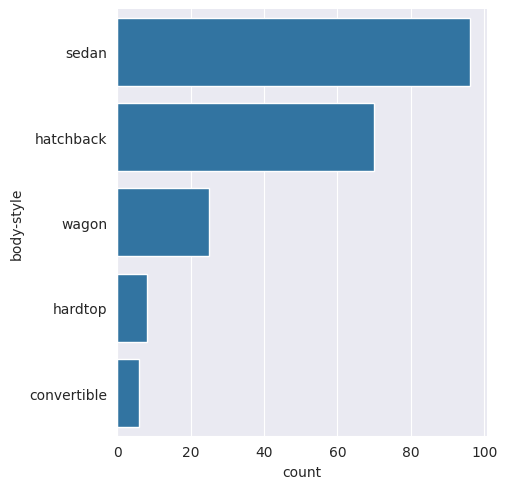

In [10]:
# Use sorted  Count Plot to visualize data
plt.figure(figsize=(7,10))
sns.catplot(y ='body-style', kind = "count",data = df,order=df['body-style'].value_counts().index)
plt.show()

By examining this plot, we can derive insights about the distribution and popularity of different car body styles in 1985, which can inform our understanding of historical automotive market trends.  

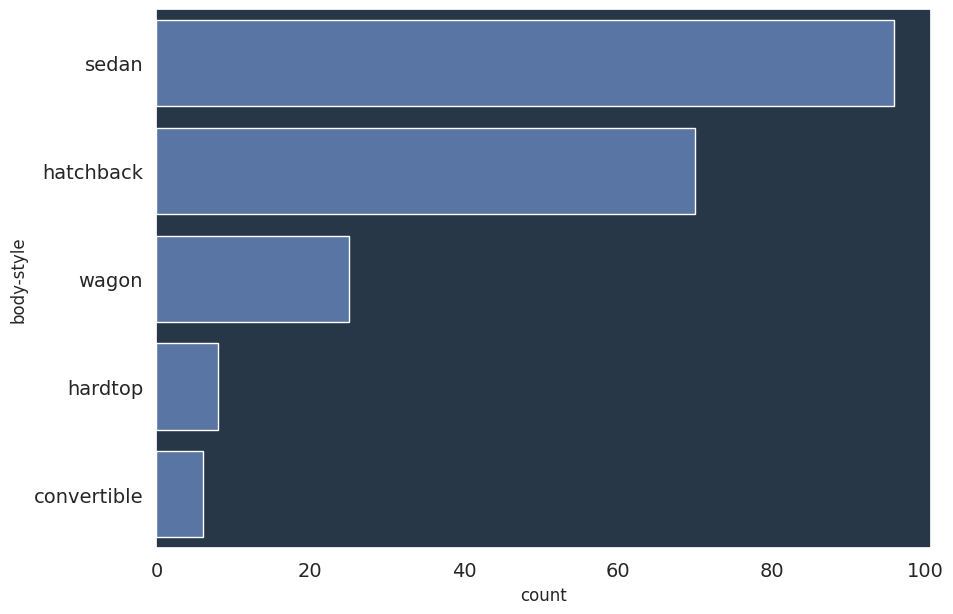

In [11]:
#Changing the background of count plot
plt.figure(figsize=(10,7))
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':14,'ytick.labelsize':14})
sns.countplot(df['body-style'], order=df['body-style'].value_counts().index)
plt.show()

* It reveals market preferences, highlights the most and least common body styles, and sets the stage for more detailed analyses on why certain body styles were more popular than others

### | Boxplot |


Boxplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable.

The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

#### ➡️ official documentation   :-  https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: ylabel='engine-size'>

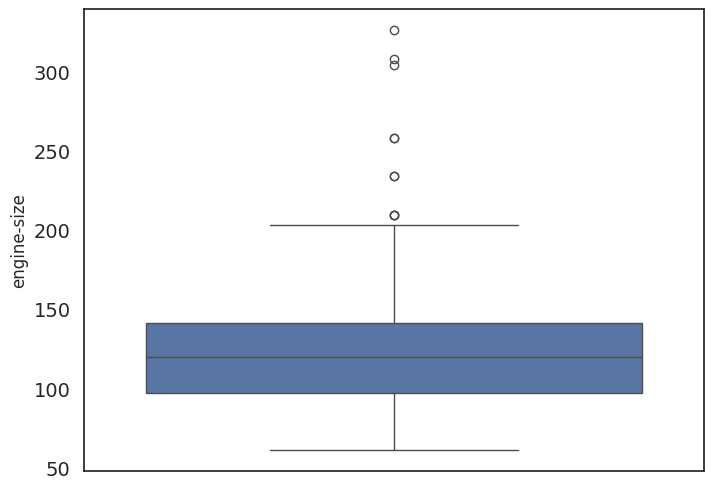

In [12]:
# Simple boxplot
sns.set_style("white")
plt.figure(figsize=(8,6))
sns.boxplot(df["engine-size"])

<Axes: >

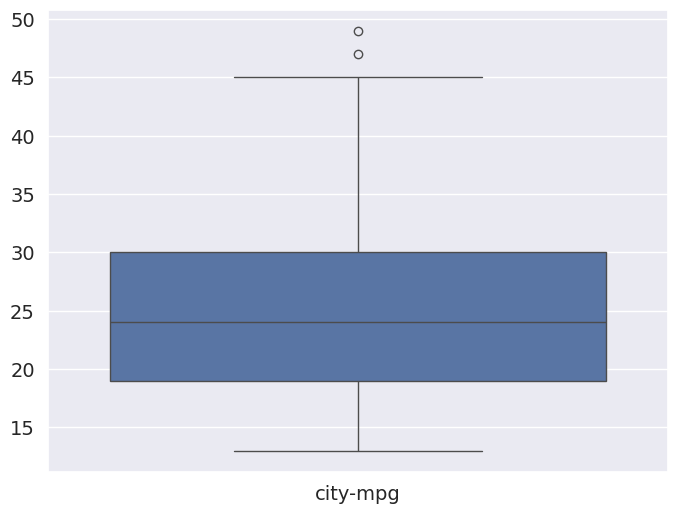

In [14]:
# Vertical boxplot
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
sns.boxplot([df['num-of-doors'], df['city-mpg']])

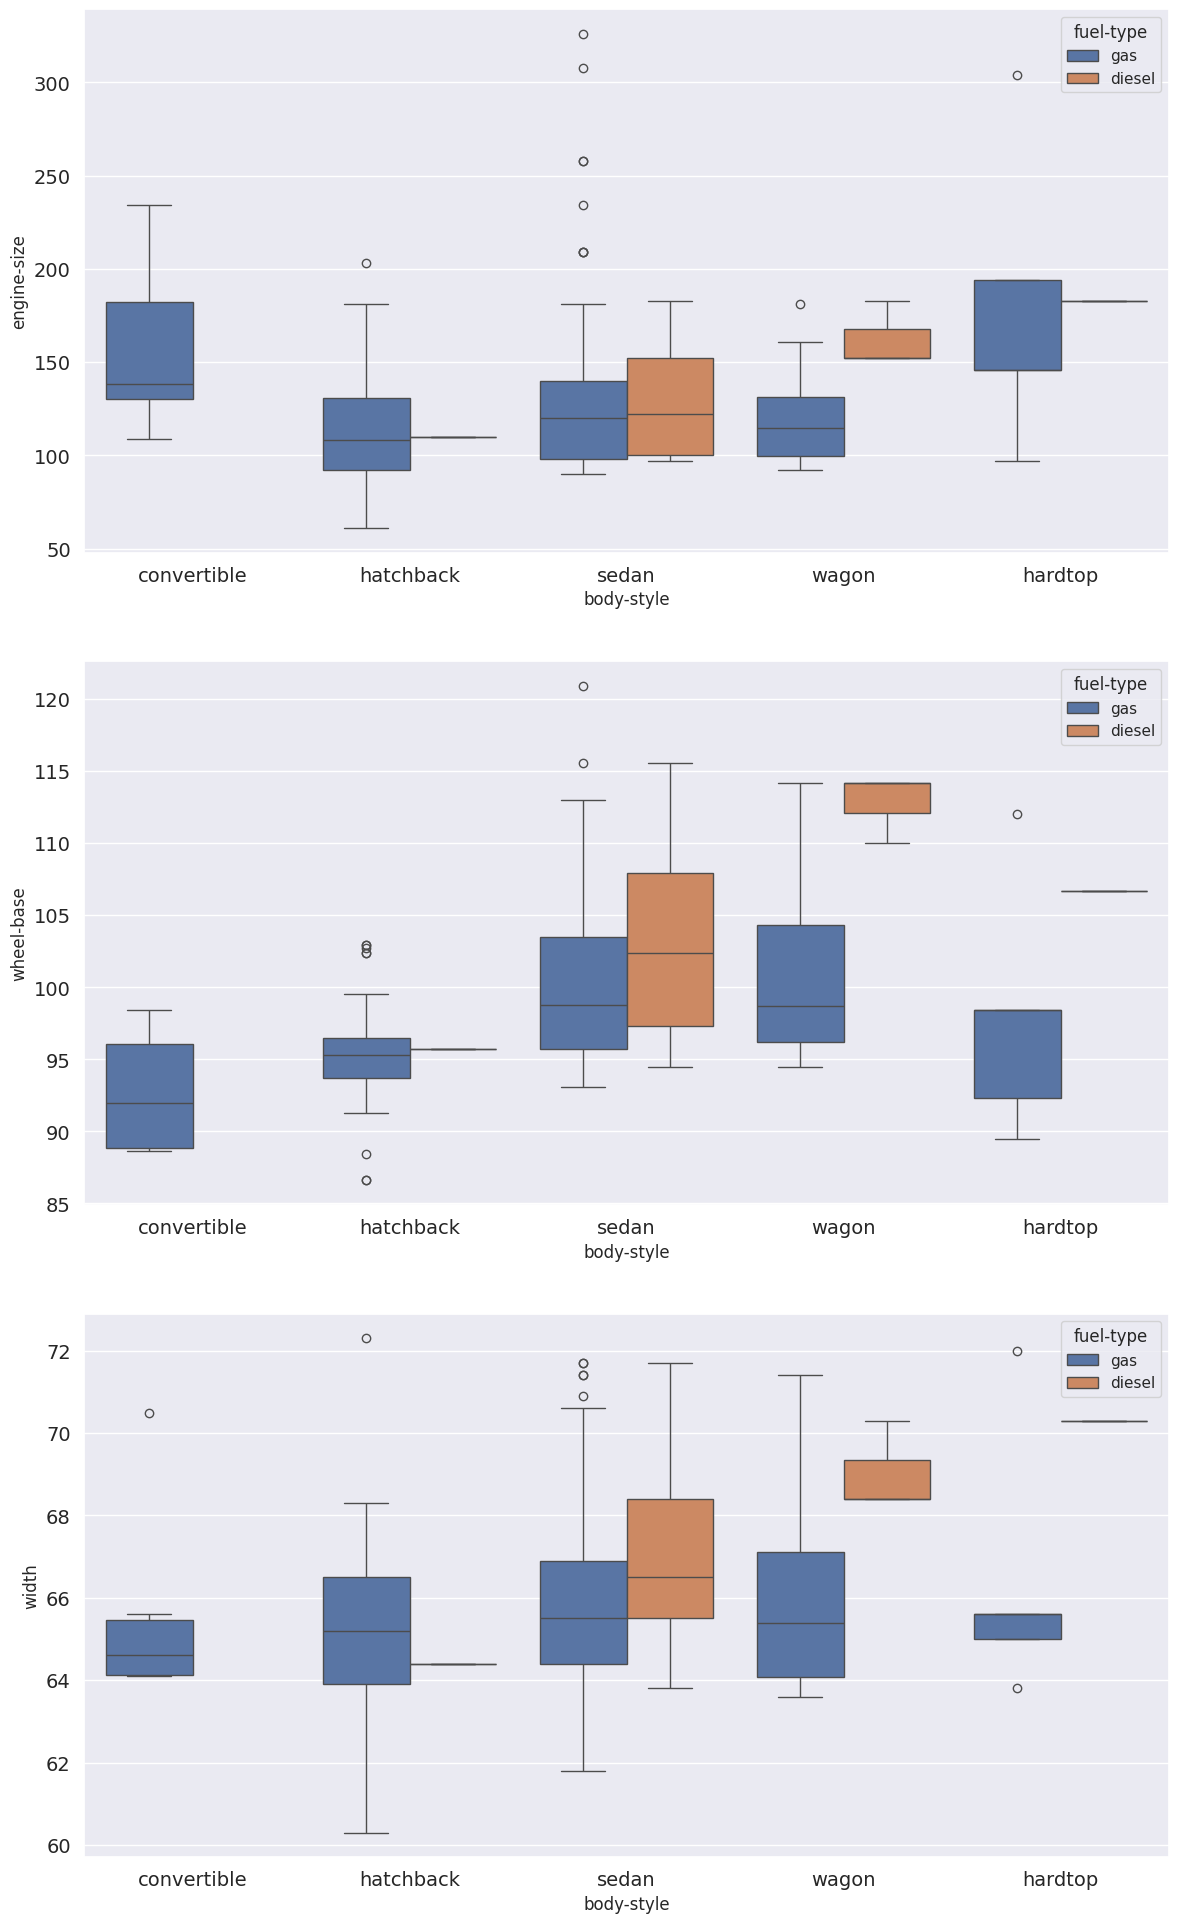

In [15]:
#Plotting subplots
plt.subplots(figsize = (14,24))
plt.subplot(3,1,1)
sns.boxplot(x= df['body-style'] , y= df['engine-size'] ,hue= df["fuel-type"])
plt.subplot(3,1,2)
sns.boxplot(x=df['body-style'], y=df["wheel-base"], hue=df["fuel-type"])
plt.subplot(3,1,3)
sns.boxplot(x=df['body-style'],y=df["width"] , hue=df["fuel-type"])
plt.show()

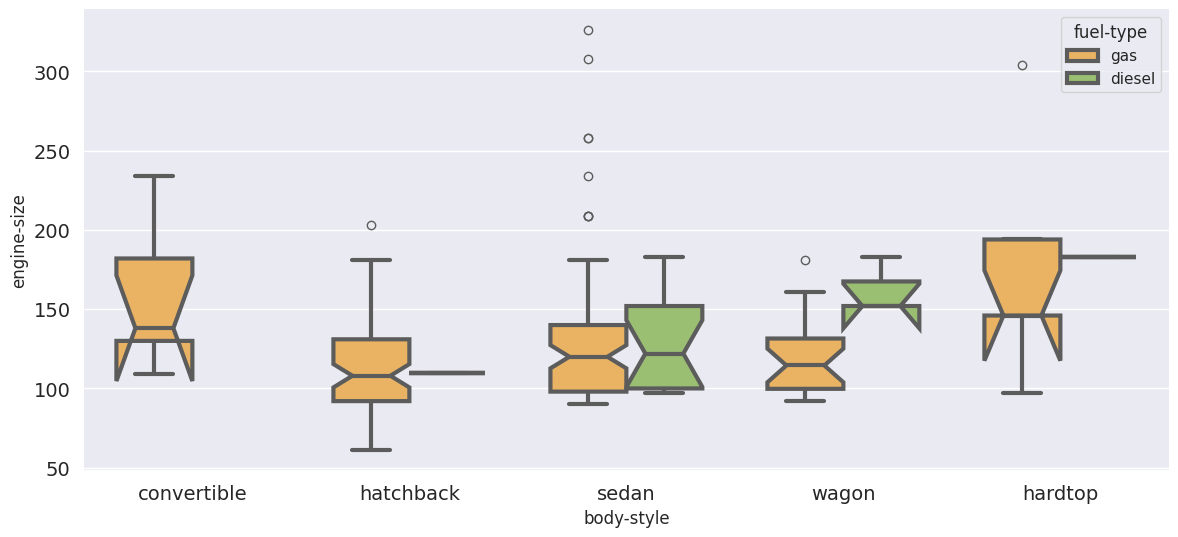

In [16]:
# Add a notch to the box

plt.figure(figsize = (14,6))
sns.boxplot(x= df['body-style'] , y= df['engine-size'] ,hue= df["fuel-type"],width=.7,palette= {"gas":'#FFB74D' , "diesel":'#9CCC65'},linewidth = 3,notch=True)
sns.despine(left=True)
# More about sns.despine() here - https://seaborn.pydata.org/tutorial/aesthetics.html
plt.show()

### | Boxen Plot |

The Boxen Plot shows a large number of quantiles.By plotting more quantiles, it provides more information about the shape of the distribution, particularly in the tails.

#### ➡️ official documentation   :-  https://seaborn.pydata.org/generated/seaborn.boxenplot.html

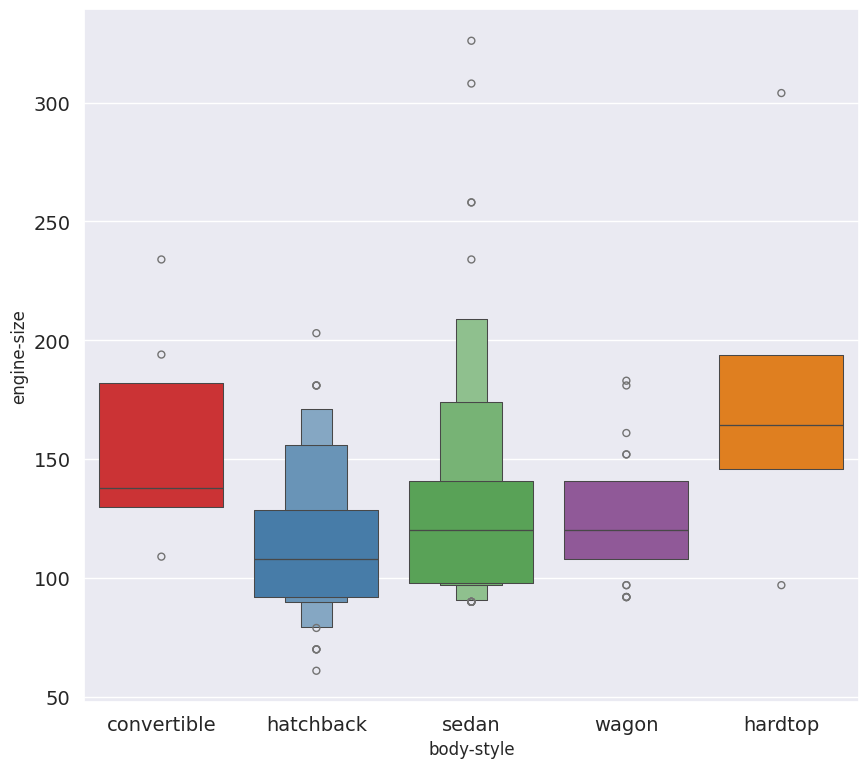

In [17]:
# Drawing a vertical boxenplot grouped by a categorical variable
sns.set_style("darkgrid")
plt.figure(figsize=(10,9))
sns.boxenplot(x=df["body-style"] , y = df["engine-size"] ,palette="Set1")
plt.show()

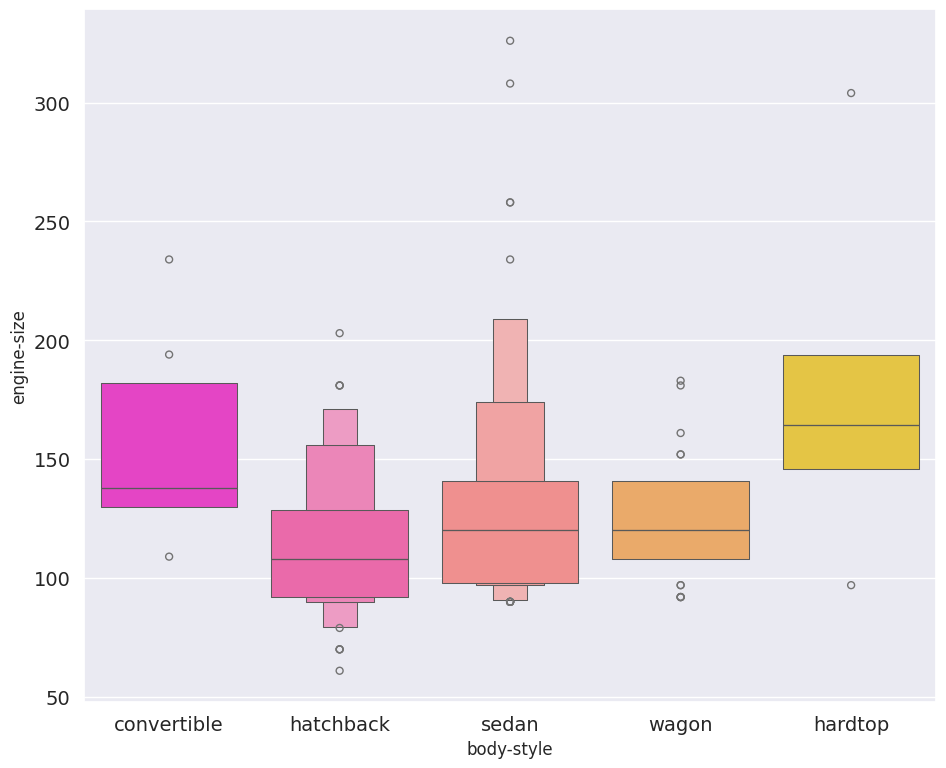

In [18]:
# Using spring palette
plt.figure(figsize=(11,9))
sns.boxenplot(x=df["body-style"] , y = df["engine-size"],palette="spring")
plt.show()

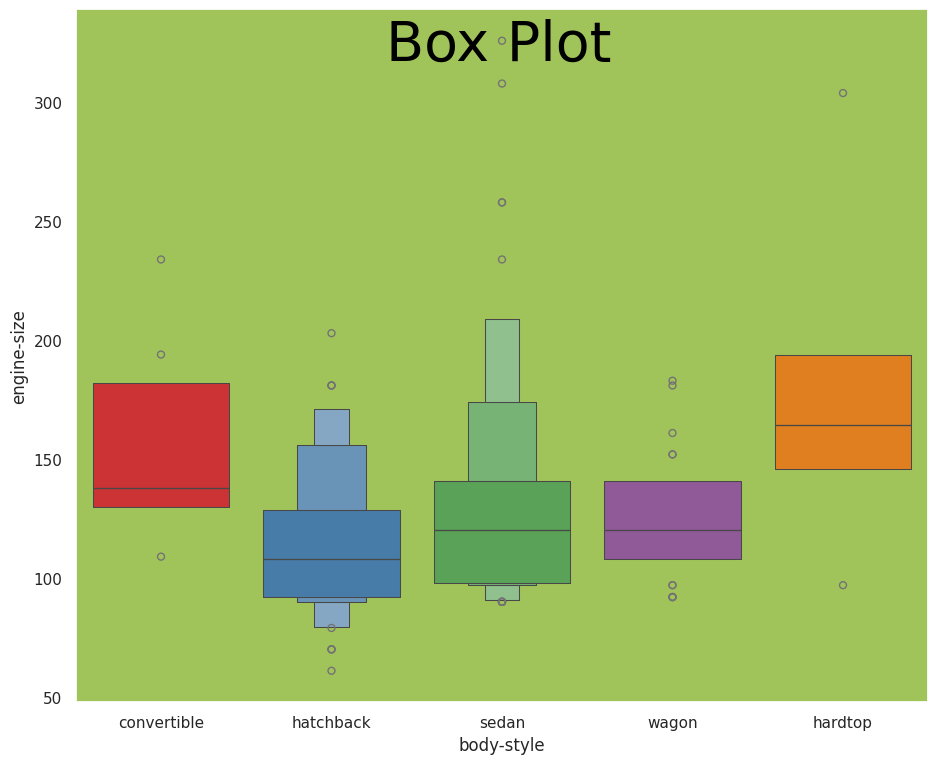

In [19]:
sns.set(rc={"axes.facecolor":"#a1c45a" , "axes.grid" : False})
plt.figure(figsize=(11,9))
plt.gcf().text(.51, .84, "Box Plot", fontsize = 40, color='Black' ,ha='center', va='center')
sns.boxenplot(x=df["body-style"] , y = df["engine-size"],palette="Set1")
plt.show()